In [1]:
import pandas as pd
from pyfolio.timeseries import perf_stats
%matplotlib inline

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
df = pd.read_csv('/home/tomek/ib_tools/blotter/backtest_2019-10-25_16-20.csv')
df['realizedPNL_net'] = df['realizedPNL'] - 3.02
df['cumsum'] = df.realizedPNL_net.cumsum()
df['result'] = 100000 + df['cumsum']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result
time,,,,,,,,,,,,,,
2018-02-09 00:58:00,NKDZ9,SELL,1,21102.500,[1],1,entry,1,1.3,USD,0.0,-3.02,-3.02,99996.98
2018-02-09 01:19:00,NKDZ9,BUY,1,21236.000,[2],2,stop-out,2,1.3,USD,-667.5,-670.52,-673.54,99326.46
2018-02-09 09:28:00,GCZ9,SELL,1,1316.150,[3],3,entry,3,1.3,USD,0.0,-3.02,-676.56,99323.44
2018-02-09 13:31:00,GCZ9,BUY,1,1318.880,[4],4,stop-out,4,1.3,USD,-273.0,-276.02,-952.58,99047.42
2018-02-09 14:10:00,CLX9,SELL,1,60.354,[5],5,entry,5,1.3,USD,0.0,-3.02,-955.60,99044.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03 17:22:00,ESZ9,BUY,1,2896.300,[3070],3503,close,3070,1.3,USD,3702.5,3699.48,-157328.51,-57328.51
2019-10-03 19:45:00,CLX9,BUY,1,52.443,[3071],3504,close,3071,1.3,USD,2841.0,2837.98,-154490.53,-54490.53
2019-10-03 19:49:00,NQZ9,BUY,1,7651.750,[3072],3505,entry,3072,1.3,USD,0.0,-3.02,-154493.55,-54493.55


In [3]:
len(df)

3074

In [4]:
df.realizedPNL.sum()

-145723.11000000002

In [5]:
df.realizedPNL_net.sum()

-155006.59000000003

In [6]:
returns = pd.DataFrame()
returns['dollars'] = df['result'].resample('D').last()
returns.loc[returns.index[0] - pd.Timedelta(days=1), 'dollars'] = 100000
returns.sort_index(inplace=True)
returns.dollars.fillna(method='ffill', inplace=True)
returns['returns'] = returns['dollars'].pct_change()
returns

,dollars,returns
time,,
2018-02-08,100000.00,NaN
2018-02-09,93309.10,-0.066909
2018-02-10,93309.10,0.000000
2018-02-11,93309.10,0.000000
2018-02-12,91805.61,-0.016113
...,...,...
2019-09-30,-63824.11,0.020476
2019-10-01,-63572.29,-0.003946
2019-10-02,-64243.37,0.010556


In [7]:
perf_stats(returns['returns'])

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/empyrical/stats.py:445: RuntimeWarning: invalid value encountered in double_scalars
  return ending_value ** (1 / num_years) - 1
/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/empyrical/stats.py:1492: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()


Annual return                NaN
Cumulative returns     -1.550066
Annual volatility      12.984715
Sharpe ratio            0.449751
Calmar ratio                 NaN
Stability                    NaN
Max drawdown           -1.754227
Omega ratio             1.648876
Sortino ratio           1.427516
Skew                         NaN
Kurtosis                     NaN
Tail ratio              0.671608
Daily value at risk    -1.612746
dtype: float64

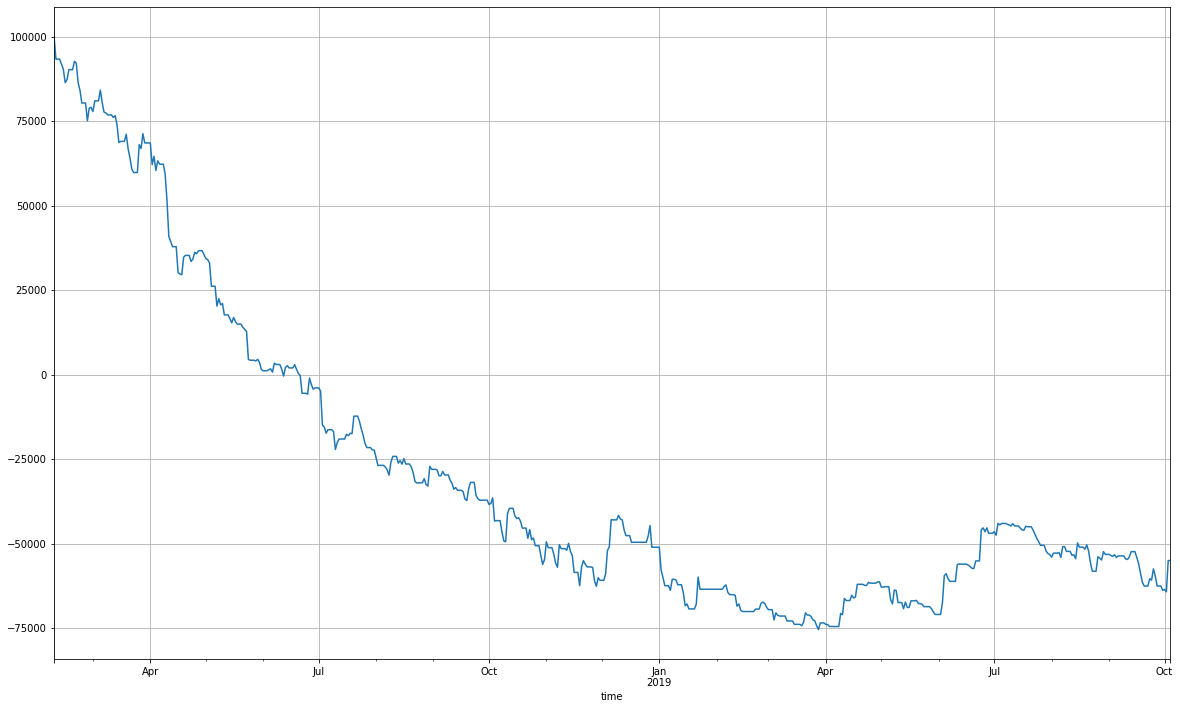

In [8]:
returns['dollars'].plot(figsize=(20,12), grid=True);

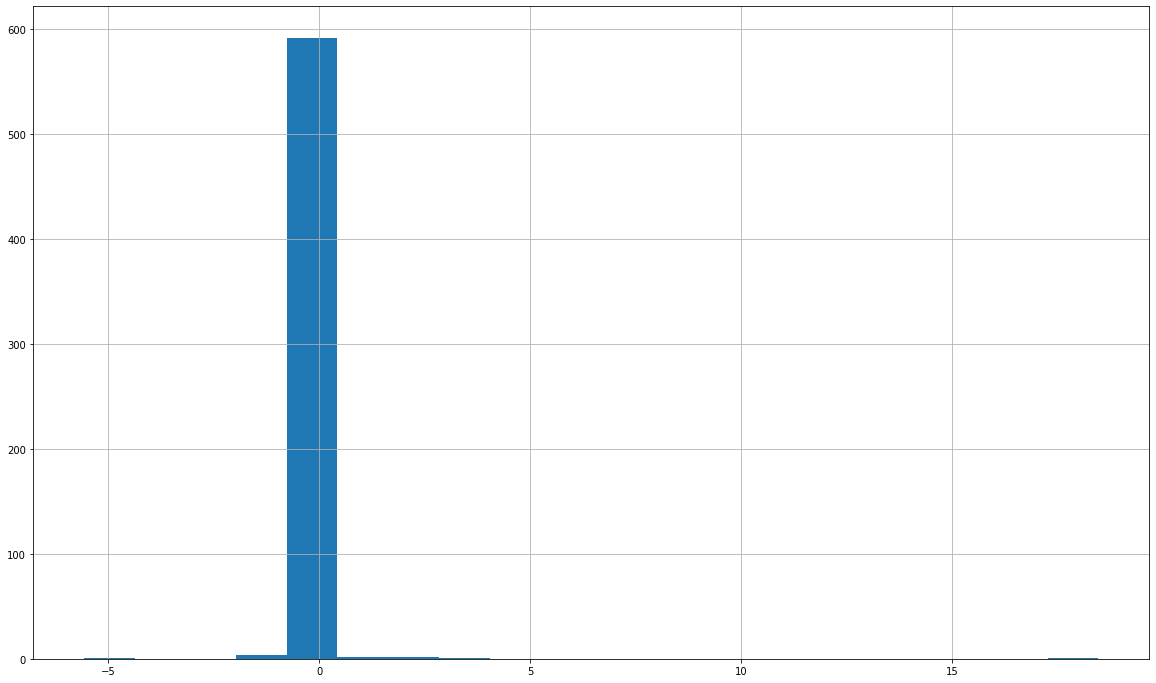

In [9]:
returns['returns'].hist(bins=20, figsize=(20,12), grid=True);

In [19]:
nq = df[df['contract'].str.startswith('NQ')]
nq

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,
2018-02-09 16:50:00,NQZ9,SELL,1,6300.250,[8],9,entry,8,1.3,USD,0.0,-3.02,-1289.66,98710.34,NQ
2018-02-09 16:55:00,NQZ9,BUY,1,6348.625,[11],11,stop-out,11,1.3,USD,-967.5,-970.52,-3084.97,96915.03,NQ
2018-02-09 18:05:00,NQZ9,SELL,1,6280.100,[14],17,entry,14,1.3,USD,0.0,-3.02,-3094.03,96905.97,NQ
2018-02-09 20:10:00,NQZ9,BUY,1,6325.850,[16],18,stop-out,16,1.3,USD,-915.0,-918.02,-4946.32,95053.68,NQ
2018-02-09 21:56:00,NQZ9,BUY,1,6427.825,[19],21,entry,19,1.3,USD,0.0,-3.02,-5800.38,94199.62,NQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01 17:09:00,NQZ9,SELL,1,7747.875,[3058],3488,entry,3058,1.3,USD,0.0,-3.02,-163569.27,-63569.27,NQ
2019-10-03 17:13:00,NQZ9,BUY,1,7599.650,[3069],3502,close,3069,1.3,USD,2964.5,2961.48,-161027.99,-61027.99,NQ
2019-10-03 19:49:00,NQZ9,BUY,1,7651.750,[3072],3505,entry,3072,1.3,USD,0.0,-3.02,-154493.55,-54493.55,NQ


In [20]:
nq['realizedPNL'].sum()

12797.019999999999

In [21]:
nq['realizedPNL_net'].sum()

10667.919999999993

In [22]:
df['symbol'] = df['contract'].str[:2]
df

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,
2018-02-09 00:58:00,NKDZ9,SELL,1,21102.500,[1],1,entry,1,1.3,USD,0.0,-3.02,-3.02,99996.98,NK
2018-02-09 01:19:00,NKDZ9,BUY,1,21236.000,[2],2,stop-out,2,1.3,USD,-667.5,-670.52,-673.54,99326.46,NK
2018-02-09 09:28:00,GCZ9,SELL,1,1316.150,[3],3,entry,3,1.3,USD,0.0,-3.02,-676.56,99323.44,GC
2018-02-09 13:31:00,GCZ9,BUY,1,1318.880,[4],4,stop-out,4,1.3,USD,-273.0,-276.02,-952.58,99047.42,GC
2018-02-09 14:10:00,CLX9,SELL,1,60.354,[5],5,entry,5,1.3,USD,0.0,-3.02,-955.60,99044.40,CL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-03 17:22:00,ESZ9,BUY,1,2896.300,[3070],3503,close,3070,1.3,USD,3702.5,3699.48,-157328.51,-57328.51,ES
2019-10-03 19:45:00,CLX9,BUY,1,52.443,[3071],3504,close,3071,1.3,USD,2841.0,2837.98,-154490.53,-54490.53,CL
2019-10-03 19:49:00,NQZ9,BUY,1,7651.750,[3072],3505,entry,3072,1.3,USD,0.0,-3.02,-154493.55,-54493.55,NQ


In [23]:
df.groupby('symbol').realizedPNL.sum()

symbol
CL   -141269.08
ES     13209.87
GC      4682.40
NK    -35143.32
NQ     12797.02
Name: realizedPNL, dtype: float64

In [24]:
nq = df[df['symbol'] == 'NQ']

In [25]:
nq.price.count()

705

In [26]:
nq

,contract,action,amount,price,exec_ids,order_id,reason,com_exec_id,commission,currency,realizedPNL,realizedPNL_net,cumsum,result,symbol
time,,,,,,,,,,,,,,,
2018-02-09 16:50:00,NQZ9,SELL,1,6300.250,[8],9,entry,8,1.3,USD,0.0,-3.02,-1289.66,98710.34,NQ
2018-02-09 16:55:00,NQZ9,BUY,1,6348.625,[11],11,stop-out,11,1.3,USD,-967.5,-970.52,-3084.97,96915.03,NQ
2018-02-09 18:05:00,NQZ9,SELL,1,6280.100,[14],17,entry,14,1.3,USD,0.0,-3.02,-3094.03,96905.97,NQ
2018-02-09 20:10:00,NQZ9,BUY,1,6325.850,[16],18,stop-out,16,1.3,USD,-915.0,-918.02,-4946.32,95053.68,NQ
2018-02-09 21:56:00,NQZ9,BUY,1,6427.825,[19],21,entry,19,1.3,USD,0.0,-3.02,-5800.38,94199.62,NQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-01 17:09:00,NQZ9,SELL,1,7747.875,[3058],3488,entry,3058,1.3,USD,0.0,-3.02,-163569.27,-63569.27,NQ
2019-10-03 17:13:00,NQZ9,BUY,1,7599.650,[3069],3502,close,3069,1.3,USD,2964.5,2961.48,-161027.99,-61027.99,NQ
2019-10-03 19:49:00,NQZ9,BUY,1,7651.750,[3072],3505,entry,3072,1.3,USD,0.0,-3.02,-154493.55,-54493.55,NQ


In [27]:
df.resample('D').last().price.count()

400

In [28]:
nq.price.count() / df.resample('D').last().price.count()

1.7625